# (E18)18th_Project-OCR
***
## 1. 이미지 불러오기
## 2. Google OCR API
## 3. keras-ocr
## 4. Tesseract
## 5. 결과 분석과 결론 제시
***

## 1. 이미지 불러오기

      사용할 이미지 20장을 불러옵니다. 10장은 영어, 다른 10장은 한국어로 이루어져있습니다. 현실의 사진 이외에도 다양한 왜곡을 준 이미지를 사용했습니다.

In [1]:
import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt
import keras_ocr
import warnings

warnings.filterwarnings(action='ignore') 

path = os.getenv('HOME')+'/aiffel/ocr_python/attachments/'
img_name = os.listdir(path)

img_name

['countercircle_kor.png',
 'label_kor.jpg',
 'circle_eng.png',
 'sign_eng.png',
 'book_eng.png',
 'down_semicircle_eng.png',
 'sign_kor.png',
 'book_kor.png',
 'straight_kor.png',
 'down_semicircle_kor.png',
 'upsidedown_eng.png',
 'label_eng.jpg',
 'circle_kor.png',
 'countercircle_eng.png',
 'semicircle_eng.png',
 'semicircle_kor.png',
 'board_eng.jpg',
 'upsidedown_kor.png',
 'board_kor.jpg',
 'straight_eng.png']

In [2]:
img_list = []

for name in img_name:
    img_list.append(path+name)
    
img_list.sort()
img_list

['/home/aiffel-dj39/aiffel/ocr_python/attachments/board_eng.jpg',
 '/home/aiffel-dj39/aiffel/ocr_python/attachments/board_kor.jpg',
 '/home/aiffel-dj39/aiffel/ocr_python/attachments/book_eng.png',
 '/home/aiffel-dj39/aiffel/ocr_python/attachments/book_kor.png',
 '/home/aiffel-dj39/aiffel/ocr_python/attachments/circle_eng.png',
 '/home/aiffel-dj39/aiffel/ocr_python/attachments/circle_kor.png',
 '/home/aiffel-dj39/aiffel/ocr_python/attachments/countercircle_eng.png',
 '/home/aiffel-dj39/aiffel/ocr_python/attachments/countercircle_kor.png',
 '/home/aiffel-dj39/aiffel/ocr_python/attachments/down_semicircle_eng.png',
 '/home/aiffel-dj39/aiffel/ocr_python/attachments/down_semicircle_kor.png',
 '/home/aiffel-dj39/aiffel/ocr_python/attachments/label_eng.jpg',
 '/home/aiffel-dj39/aiffel/ocr_python/attachments/label_kor.jpg',
 '/home/aiffel-dj39/aiffel/ocr_python/attachments/semicircle_eng.png',
 '/home/aiffel-dj39/aiffel/ocr_python/attachments/semicircle_kor.png',
 '/home/aiffel-dj39/aiffel/ocr

## 2. Google OCR API

      먼저 구글 OCR API를 이용하여 글자를 인식해봅니다.

In [3]:
def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    
    print('Texts:')

    for text in texts:
        print('\n"{}"'.format(text.description))

    vertices = (['({},{})'.format(vertex.x, vertex.y)
                 for vertex in text.bounding_poly.vertices])

    print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

      테스트 이미지를 하나 사용하여 잘 불러와지는지 확인해봅니다.

In [4]:
# 다운받은 인증키 경로가 정확하게 지정되어 있어야 합니다. 
!ls -l $GOOGLE_APPLICATION_CREDENTIALS

import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] =  os.getenv('HOME')+'/aiffel/ocr_python/my_google_api_key.json'

# 입력 이미지 경로를 지정해 주세요.
path_sample = os.getenv('HOME')+'/aiffel/ocr_python/attachments/straight_eng.png'

# 위에서 정의한 OCR API 이용 함수를 호출해 봅시다.
detect_text(path_sample)

-rw-rw-r-- 1 aiffel-dj39 aiffel-dj39 2325  3월 16 09:54 /home/aiffel-dj39/aiffel/ocr_python/my_google_api_key.json
Texts:

"text recognition test for various models.
text recognition test for various models.
text recognition test for various models.
text recognition test for various models.
text recognition test for various models.
text recognition test for various models.
text recognition test for various models.
"

"text"

"recognition"

"test"

"for"

"various"

"models."

"text"

"recognition"

"test"

"for"

"various"

"models."

"text"

"recognition"

"test"

"for"

"various"

"models."

"text"

"recognition"

"test"

"for"

"various"

"models."

"text"

"recognition"

"test"

"for"

"various"

"models."

"text"

"recognition"

"test"

"for"

"various"

"models."

"text"

"recognition"

"test"

"for"

"various"

"models."
bounds: (654,339),(710,339),(710,350),(654,350)


      잘 불러와지고 글자도 인식이 잘 되는것을 확인했으므로 이제 20장의 이미지에 대해 글자 인식을 진행해봅니다.

In [5]:
for img in img_list:
    print('start text of', img)
    detect_text(img)
    print('end text\n')

start text of /home/aiffel-dj39/aiffel/ocr_python/attachments/board_eng.jpg
Texts:

"Push
Button
To Cross
Next Half
Of Road
"

"Push"

"Button"

"To"

"Cross"

"Next"

"Half"

"Of"

"Road"
bounds: (304,214),(350,217),(349,232),(303,229)
end text

start text of /home/aiffel-dj39/aiffel/ocr_python/attachments/board_kor.jpg
Texts:

"사용중
입니다
잠시 기다려 주세요
"

"사용중"

"입니다"

"잠시"

"기다려"

"주세요"
bounds: (339,482),(431,482),(431,528),(339,528)
end text

start text of /home/aiffel-dj39/aiffel/ocr_python/attachments/book_eng.png
Texts:

"Maisy chooses
Some apples and
bananas.
Mmmm,
they look good.
"

"Maisy"

"chooses"

"Some"

"apples"

"and"

"bananas."

"Mmmm,"

"they"

"look"

"good."
bounds: (155,177),(225,177),(225,208),(155,208)
end text

start text of /home/aiffel-dj39/aiffel/ocr_python/attachments/book_kor.png
Texts:

""교지와 연감을 찾아왔어요. "
폴린의 목소리가 나를 다시 현실세계로 끌어냈다.
"한 가지 물어봐도 될까요?"
폴린이 탁자 위에 한 뭉텅이의 자료를 내려놓으며 물었다.
"당신은 내가 허락해주길 기다릴 사람은 아니잖아요."
"작가님은 왜 빙카 사건에 대한 글을 쓰지 않죠?"
사람들은 늘 나를 책 이야기로 이끌었다.

      글자가 거꾸로 적혀있어도 제대로 인식이 되는 것을 확인할 수 있었습니다. 또한 영어나 한국어, 한자를 따로 지정하지 않아도 알아서 인식하여 표시해주는 등 가장 뛰어난 성능을 보여줬습니다.

## 3. keras-ocr 

      이번엔 케라스 OCR을 이용하여 글자를 인식해봤습니다.

In [6]:
# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /home/aiffel-dj39/.keras-ocr/craft_mlt_25k.h5
Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.
Looking for /home/aiffel-dj39/.keras-ocr/crnn_kurapan.h5


      이미지는 위와 마찬가지로 20장의 글자사진을 사용합니다.

In [7]:
# 테스트에 사용할 이미지 url을 모아 봅니다. 추가로 더 모아볼 수도 있습니다. 
image_urls = img_list

images = [ keras_ocr.tools.read(url) for url in image_urls]
prediction_groups = [pipeline.recognize([url]) for url in image_urls]

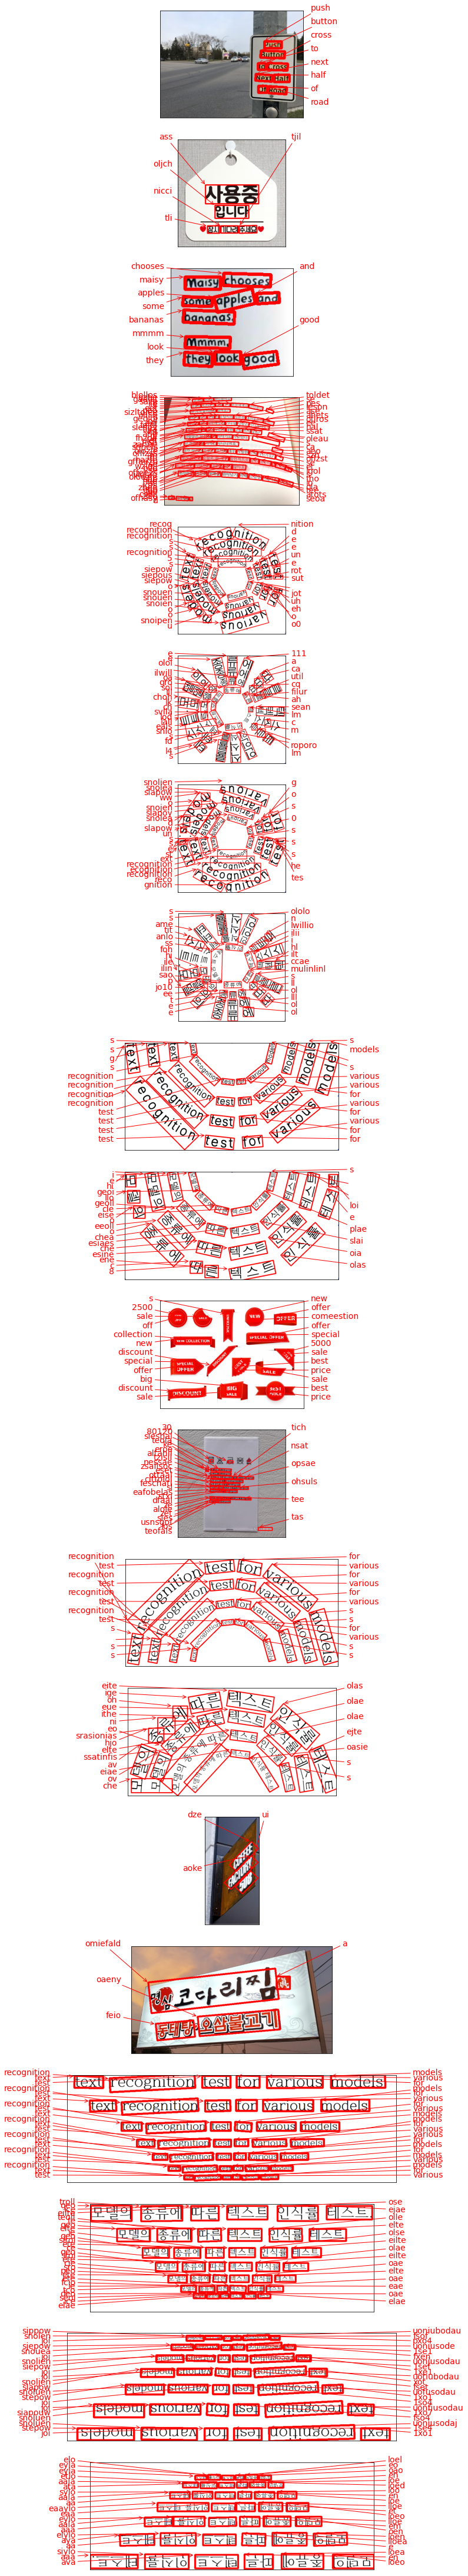

In [8]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(80, 80))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

      시각화 해서 쉽게 확인할 수 있는 장점이 있었습니다. 성능은 구글과는 다르게 왜곡이 심하거나 뒤집혀 있으면 인식이 불가능 했습니다. 그리고 한국어는 단어 단위와 띄어쓰기는 잡아낼 수 있었지만 제대로 인식하여 표기할 수는 없었습니다.

## 4. Tesseract

      마지막으로 테서렉트를 이용하여 글자 인식을 진행해봤습니다. 20장의 사진 중, 15장의 사진만 인식에 성공했고 그나마 7장은 제대로 인식하지 못했습니다. 나머지 8장은 중에 제대로 인식된것은 똑바르게, 직진으로 쓰여져 있는 경우만 성공했습니다.

In [28]:
import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt

# OCR Engine modes(–oem):
# 0 - Legacy engine only.
# 1 - Neural nets LSTM engine only.
# 2 - Legacy + LSTM engines.
# 3 - Default, based on what is available.

# Page segmentation modes(–psm):
# 0 - Orientation and script detection (OSD) only.
# 1 - Automatic page segmentation with OSD.
# 2 - Automatic page segmentation, but no OSD, or OCR.
# 3 - Fully automatic page segmentation, but no OSD. (Default)
# 4 - Assume a single column of text of variable sizes.
# 5 - Assume a single uniform block of vertically aligned text.
# 6 - Assume a single uniform block of text.
# 7 - Treat the image as a single text line.
# 8 - Treat the image as a single word.
# 9 - Treat the image as a single word in a circle.
# 10 - Treat the image as a single character.
# 11 - Sparse text. Find as much text as possible in no particular order.
# 12 - Sparse text with OSD.
# 13 - Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

def crop_word_regions(image_path='./images/sample.png', output_path='./output', lan = 'eng'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang=lan,    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list


work_dir = os.getenv('HOME')+'/aiffel/ocr_python'
img_file_path = work_dir + '/test1.jpeg'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir+'/test_output')

/home/aiffel-dj39/aiffel/ocr_python/test_output/0000.png
/home/aiffel-dj39/aiffel/ocr_python/test_output/0001.png
/home/aiffel-dj39/aiffel/ocr_python/test_output/0002.png
/home/aiffel-dj39/aiffel/ocr_python/test_output/0003.png
/home/aiffel-dj39/aiffel/ocr_python/test_output/0004.png
/home/aiffel-dj39/aiffel/ocr_python/test_output/0005.png
/home/aiffel-dj39/aiffel/ocr_python/test_output/0006.png
/home/aiffel-dj39/aiffel/ocr_python/test_output/0007.png
/home/aiffel-dj39/aiffel/ocr_python/test_output/0008.png
/home/aiffel-dj39/aiffel/ocr_python/test_output/0009.png


In [29]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_path_list)

; Ff ent fg £§« he ——_—_—wo Cm tetres*™ >, oS etGjeerei&ew.m™,,i = Las tft .lUCSPRyLUU Oe

gado|

=

oe

—

0}

oc} =

EIA E

O] A

Ay] =

Done


In [30]:
work_dir = os.getenv('HOME')+'/aiffel/ocr_python/attachments'
img_file_path = work_dir + '/board_kor.jpg'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir+'/board_kor_output', lan = 'kor')
recognize_images(cropped_image_path_list)

/home/aiffel-dj39/aiffel/ocr_python/attachments/board_kor_output/0000.png
/home/aiffel-dj39/aiffel/ocr_python/attachments/board_kor_output/0001.png
/home/aiffel-dj39/aiffel/ocr_python/attachments/board_kor_output/0002.png
/home/aiffel-dj39/aiffel/ocr_python/attachments/board_kor_output/0003.png
/home/aiffel-dj39/aiffel/ocr_python/attachments/board_kor_output/0004.png
/home/aiffel-dj39/aiffel/ocr_python/attachments/board_kor_output/0005.png
/home/aiffel-dj39/aiffel/ocr_python/attachments/board_kor_output/0006.png
/home/aiffel-dj39/aiffel/ocr_python/attachments/board_kor_output/0007.png
/home/aiffel-dj39/aiffel/ocr_python/attachments/board_kor_output/0008.png
/home/aiffel-dj39/aiffel/ocr_python/attachments/board_kor_output/0009.png
/home/aiffel-dj39/aiffel/ocr_python/attachments/board_kor_output/0010.png
/home/aiffel-dj39/aiffel/ocr_python/attachments/board_kor_output/0011.png
/home/aiffel-dj39/aiffel/ocr_python/attachments/board_kor_output/0012.png
/home/aiffel-dj39/aiffel/ocr_python/at

In [32]:
work_dir = os.getenv('HOME')+'/aiffel/ocr_python/attachments'
img_file_path = work_dir + '/book_kor.png'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir+'/book_kor_output', lan = 'kor')
recognize_images(cropped_image_path_list)

/home/aiffel-dj39/aiffel/ocr_python/attachments/book_kor_output/0000.png
/home/aiffel-dj39/aiffel/ocr_python/attachments/book_kor_output/0001.png
/home/aiffel-dj39/aiffel/ocr_python/attachments/book_kor_output/0002.png
/home/aiffel-dj39/aiffel/ocr_python/attachments/book_kor_output/0003.png
/home/aiffel-dj39/aiffel/ocr_python/attachments/book_kor_output/0004.png
/home/aiffel-dj39/aiffel/ocr_python/attachments/book_kor_output/0005.png
/home/aiffel-dj39/aiffel/ocr_python/attachments/book_kor_output/0006.png
/home/aiffel-dj39/aiffel/ocr_python/attachments/book_kor_output/0007.png
/home/aiffel-dj39/aiffel/ocr_python/attachments/book_kor_output/0008.png
/home/aiffel-dj39/aiffel/ocr_python/attachments/book_kor_output/0009.png
/home/aiffel-dj39/aiffel/ocr_python/attachments/book_kor_output/0010.png
/home/aiffel-dj39/aiffel/ocr_python/attachments/book_kor_output/0011.png
/home/aiffel-dj39/aiffel/ocr_python/attachments/book_kor_output/0012.png
/home/aiffel-dj39/aiffel/ocr_python/attachments/boo

In [33]:
work_dir = os.getenv('HOME')+'/aiffel/ocr_python/attachments'
img_file_path = work_dir + '/circle_kor.png'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir+'/circle_kor_output', lan = 'kor')
recognize_images(cropped_image_path_list)

/home/aiffel-dj39/aiffel/ocr_python/attachments/circle_kor_output/0000.png
se

Done


In [34]:
work_dir = os.getenv('HOME')+'/aiffel/ocr_python/attachments'
img_file_path = work_dir + '/countercircle_kor.png'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir+'/countercircle_kor_output', lan = 'kor')
recognize_images(cropped_image_path_list)

/home/aiffel-dj39/aiffel/ocr_python/attachments/countercircle_kor_output/0000.png
8

Done


In [35]:
work_dir = os.getenv('HOME')+'/aiffel/ocr_python/attachments'
img_file_path = work_dir + '/label_kor.jpg'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir+'/label_kor_output', lan = 'kor')
recognize_images(cropped_image_path_list)

/home/aiffel-dj39/aiffel/ocr_python/attachments/label_kor_output/0000.png
/home/aiffel-dj39/aiffel/ocr_python/attachments/label_kor_output/0001.png
/home/aiffel-dj39/aiffel/ocr_python/attachments/label_kor_output/0002.png
/home/aiffel-dj39/aiffel/ocr_python/attachments/label_kor_output/0003.png
/home/aiffel-dj39/aiffel/ocr_python/attachments/label_kor_output/0004.png
/home/aiffel-dj39/aiffel/ocr_python/attachments/label_kor_output/0005.png
/home/aiffel-dj39/aiffel/ocr_python/attachments/label_kor_output/0006.png
/home/aiffel-dj39/aiffel/ocr_python/attachments/label_kor_output/0007.png
/home/aiffel-dj39/aiffel/ocr_python/attachments/label_kor_output/0008.png
/home/aiffel-dj39/aiffel/ocr_python/attachments/label_kor_output/0009.png
/home/aiffel-dj39/aiffel/ocr_python/attachments/label_kor_output/0010.png
/home/aiffel-dj39/aiffel/ocr_python/attachments/label_kor_output/0011.png
/home/aiffel-dj39/aiffel/ocr_python/attachments/label_kor_output/0012.png
/home/aiffel-dj39/aiffel/ocr_python/at

In [36]:
work_dir = os.getenv('HOME')+'/aiffel/ocr_python/attachments'
img_file_path = work_dir + '/semicircle_kor.png'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir+'/semicircle_kor_output', lan = 'kor')
recognize_images(cropped_image_path_list)

/home/aiffel-dj39/aiffel/ocr_python/attachments/semicircle_kor_output/0000.png
Ze,

Done


In [37]:
work_dir = os.getenv('HOME')+'/aiffel/ocr_python/attachments'
img_file_path = work_dir + '/sign_kor.png'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir+'/sign_kor_output', lan = 'kor')
recognize_images(cropped_image_path_list)

/home/aiffel-dj39/aiffel/ocr_python/attachments/sign_kor_output/0000.png

Done


In [38]:
work_dir = os.getenv('HOME')+'/aiffel/ocr_python/attachments'
img_file_path = work_dir + '/straight_kor.png'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir+'/straight_kor_output', lan = 'kor')
recognize_images(cropped_image_path_list)

/home/aiffel-dj39/aiffel/ocr_python/attachments/straight_kor_output/0000.png
. . sate “ .

Done


In [39]:
work_dir = os.getenv('HOME')+'/aiffel/ocr_python/attachments'
img_file_path = work_dir + '/upsidedown_kor.png'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir+'/upsidedown_kor_output', lan = 'kor')
recognize_images(cropped_image_path_list)

/home/aiffel-dj39/aiffel/ocr_python/attachments/upsidedown_kor_output/0000.png
/home/aiffel-dj39/aiffel/ocr_python/attachments/upsidedown_kor_output/0001.png
/home/aiffel-dj39/aiffel/ocr_python/attachments/upsidedown_kor_output/0002.png
/home/aiffel-dj39/aiffel/ocr_python/attachments/upsidedown_kor_output/0003.png
/home/aiffel-dj39/aiffel/ocr_python/attachments/upsidedown_kor_output/0004.png
/home/aiffel-dj39/aiffel/ocr_python/attachments/upsidedown_kor_output/0005.png
/home/aiffel-dj39/aiffel/ocr_python/attachments/upsidedown_kor_output/0006.png
/home/aiffel-dj39/aiffel/ocr_python/attachments/upsidedown_kor_output/0007.png
/home/aiffel-dj39/aiffel/ocr_python/attachments/upsidedown_kor_output/0008.png
/home/aiffel-dj39/aiffel/ocr_python/attachments/upsidedown_kor_output/0009.png
/home/aiffel-dj39/aiffel/ocr_python/attachments/upsidedown_kor_output/0010.png
/home/aiffel-dj39/aiffel/ocr_python/attachments/upsidedown_kor_output/0011.png
/home/aiffel-dj39/aiffel/ocr_python/attachments/upsi

In [42]:
work_dir = os.getenv('HOME')+'/aiffel/ocr_python/attachments'
img_file_path = work_dir + '/book_eng.png'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir+'/book_eng_output', lan = 'eng')
recognize_images(cropped_image_path_list)

/home/aiffel-dj39/aiffel/ocr_python/attachments/book_eng_output/0000.png
/home/aiffel-dj39/aiffel/ocr_python/attachments/book_eng_output/0001.png
/home/aiffel-dj39/aiffel/ocr_python/attachments/book_eng_output/0002.png
/home/aiffel-dj39/aiffel/ocr_python/attachments/book_eng_output/0003.png
/home/aiffel-dj39/aiffel/ocr_python/attachments/book_eng_output/0004.png
/home/aiffel-dj39/aiffel/ocr_python/attachments/book_eng_output/0005.png
/home/aiffel-dj39/aiffel/ocr_python/attachments/book_eng_output/0006.png
/home/aiffel-dj39/aiffel/ocr_python/attachments/book_eng_output/0007.png
/home/aiffel-dj39/aiffel/ocr_python/attachments/book_eng_output/0008.png
/home/aiffel-dj39/aiffel/ocr_python/attachments/book_eng_output/0009.png
Maisy

chooses

some

apples

and

bananas.

Mmmm,

they

look

good.

Done


In [43]:
work_dir = os.getenv('HOME')+'/aiffel/ocr_python/attachments'
img_file_path = work_dir + '/circle_eng.png'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir+'/circle_eng_output', lan = 'eng')
recognize_images(cropped_image_path_list)

/home/aiffel-dj39/aiffel/ocr_python/attachments/circle_eng_output/0000.png
/home/aiffel-dj39/aiffel/ocr_python/attachments/circle_eng_output/0001.png
/home/aiffel-dj39/aiffel/ocr_python/attachments/circle_eng_output/0002.png
/home/aiffel-dj39/aiffel/ocr_python/attachments/circle_eng_output/0003.png
/home/aiffel-dj39/aiffel/ocr_python/attachments/circle_eng_output/0004.png
/home/aiffel-dj39/aiffel/ocr_python/attachments/circle_eng_output/0005.png
/home/aiffel-dj39/aiffel/ocr_python/attachments/circle_eng_output/0006.png
/home/aiffel-dj39/aiffel/ocr_python/attachments/circle_eng_output/0007.png
<@

{conti 4

X

e009 Mo

/)

ec09Nt,

o,

2G

Done


In [44]:
work_dir = os.getenv('HOME')+'/aiffel/ocr_python/attachments'
img_file_path = work_dir + '/countercircle_eng.png'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir+'/countercircle_eng_output', lan = 'eng')
recognize_images(cropped_image_path_list)

/home/aiffel-dj39/aiffel/ocr_python/attachments/countercircle_eng_output/0000.png
<<

Done


In [45]:
work_dir = os.getenv('HOME')+'/aiffel/ocr_python/attachments'
img_file_path = work_dir + '/down_semicircle_eng.png'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir+'/down_semicircle_eng_output', lan = 'eng')
recognize_images(cropped_image_path_list)

/home/aiffel-dj39/aiffel/ocr_python/attachments/down_semicircle_eng_output/0000.png
eS ts

Done


In [47]:
work_dir = os.getenv('HOME')+'/aiffel/ocr_python/attachments'
img_file_path = work_dir + '/semicircle_eng.png'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir+'/semicircle_eng_output', lan = 'eng')
recognize_images(cropped_image_path_list)

/home/aiffel-dj39/aiffel/ocr_python/attachments/semicircle_eng_output/0000.png
g ie Sy

Done


In [49]:
work_dir = os.getenv('HOME')+'/aiffel/ocr_python/attachments'
img_file_path = work_dir + '/straight_eng.png'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir+'/straight_eng_output', lan = 'eng')
recognize_images(cropped_image_path_list)

/home/aiffel-dj39/aiffel/ocr_python/attachments/straight_eng_output/0000.png
/home/aiffel-dj39/aiffel/ocr_python/attachments/straight_eng_output/0001.png
/home/aiffel-dj39/aiffel/ocr_python/attachments/straight_eng_output/0002.png
/home/aiffel-dj39/aiffel/ocr_python/attachments/straight_eng_output/0003.png
/home/aiffel-dj39/aiffel/ocr_python/attachments/straight_eng_output/0004.png
/home/aiffel-dj39/aiffel/ocr_python/attachments/straight_eng_output/0005.png
/home/aiffel-dj39/aiffel/ocr_python/attachments/straight_eng_output/0006.png
/home/aiffel-dj39/aiffel/ocr_python/attachments/straight_eng_output/0007.png
/home/aiffel-dj39/aiffel/ocr_python/attachments/straight_eng_output/0008.png
/home/aiffel-dj39/aiffel/ocr_python/attachments/straight_eng_output/0009.png
/home/aiffel-dj39/aiffel/ocr_python/attachments/straight_eng_output/0010.png
/home/aiffel-dj39/aiffel/ocr_python/attachments/straight_eng_output/0011.png
/home/aiffel-dj39/aiffel/ocr_python/attachments/straight_eng_output/0012.png

      한국어와 영어 외에도 다국어를 인식할 수 있다고 되어있었지만 영어조차 직선으로 적혀있지 않으면 인식이 제대로 진행되지 않았습니다. 그중 제대로 된것은 book_eng와 straight_eng였는데 그나마 틀린 단어가 몇 개 있었습니다.

## 5. 결과 분석과 결론 제시

      구글은 어떠한 언어든, 왜곡이 얼마나 되어있든 거의 정확하게 글자를 표시할 수 있었습니다.
      케라스는 영어는 거의 완벽하게 인식했지만, 왜곡이 있거나 다른 나라의 언어면 표시에 실패했습니다.
      테서렉트는 줄과 간격이 일정한 줄글에서는 꽤 괜찮은 성능을 보여주었지만 나머지에선 전부 성능이 처참했습니다.
      
      만약 사진에 퍼져있는 어떠한 단어를 검출해내야한다면 구글이 가장 성능이 좋을 것 같고, 사진의 정확한 시각화와 함께 단어의 정보를 제공하기 위해서는 케라스가 좋을 것 같습니다.
      책의 스캔본이나 일정한 줄과 간격을 가진 줄글에선 테서렉트도 괜찮은 선택지가 될 것 같지만 나머지 둘의 하위호환의 성능으로 굳이 위험을 감수하고 사용할 만한 이득은 없는 것 같습니다.
      
      성능과 언어의 다양성의 우위는 구글이 최고이고 그 다음으론 영어와 시각화에서 좋은 케라스, 그리고 테서렉트는 아직 실용화하기엔 무리가 있는것 같습니다.